In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/0&1/OneDrive/Documents/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Data Cleaning

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


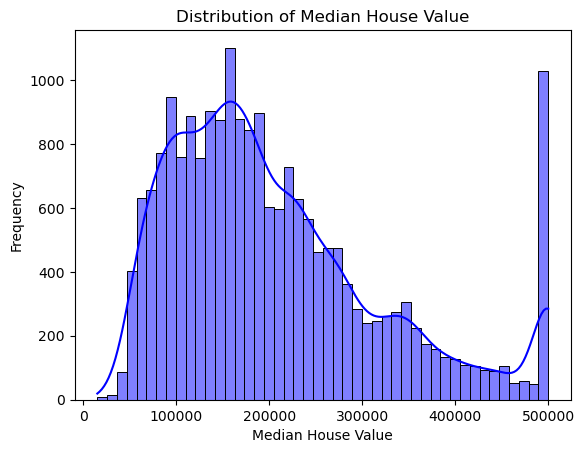

In [9]:
sns.histplot(df['median_house_value'], kde = True, color = 'blue')
plt.title(f'Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
IQR_median_house_value = df['median_house_value'].quantile(0.75) - df['median_house_value'].quantile(0.25)
IQR_median_house_value

145200.0

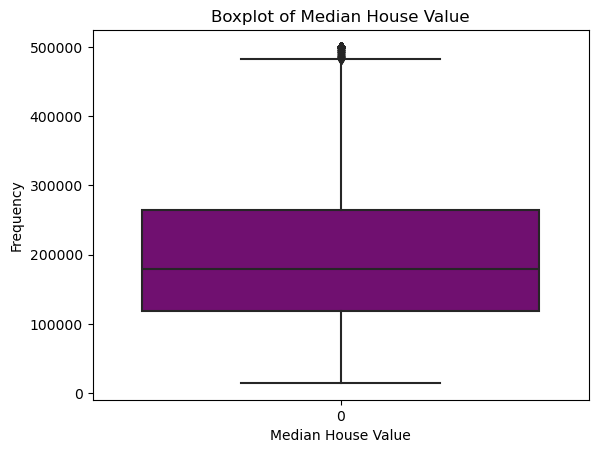

In [12]:
sns.boxplot(df['median_house_value'], color = 'purple')
plt.title(f'Boxplot of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
upper_bound = 1.5*IQR_median_house_value + df['median_house_value'].quantile(0.75)
lower_bound = df['median_house_value'].quantile(0.25) - 1.5*IQR_median_house_value
#removing outliers now
df1 = df[(df['median_house_value'] <= upper_bound) & (df['median_house_value'] >= lower_bound)]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


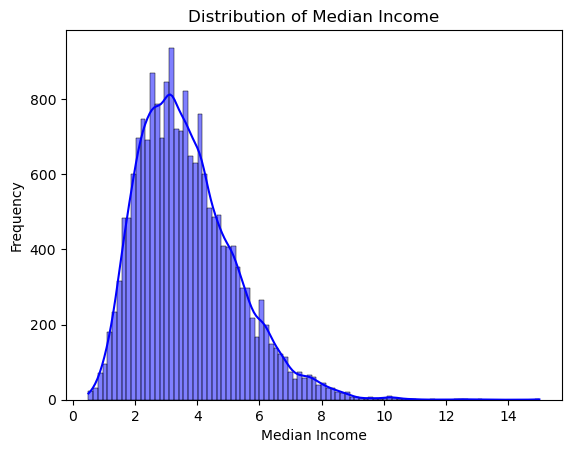

In [15]:
#now we shall check outliers in median income
#plotting the target variable, we want to see the kernel density plot to avoid binning
sns.histplot(df1['median_income'], kde = True, color = 'blue') 
plt.title(f'Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

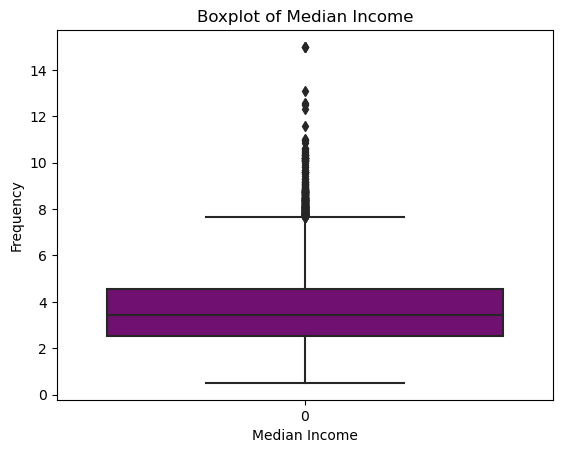

In [16]:
#lets see the boxplot for median income as well
sns.boxplot(df1['median_income'], color = 'purple')
plt.title(f'Boxplot of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

In [17]:
#cleaning outliers with median income after defining upper and lower bounds for median income
IQR_median_income = df1['median_income'].quantile(0.75) - df1['median_income'].quantile(0.25)
upper_bound = 1.5*IQR_median_income + df1['median_income'].quantile(0.75)
lower_bound = df1['median_income'].quantile(0.25) - 1.5*IQR_median_income
df2 = df1[(df1['median_income'] <= upper_bound) & (df1['median_income'] >= lower_bound)]

Correlation

Text(0.5, 1.0, 'Correlation Heatmap of Data')

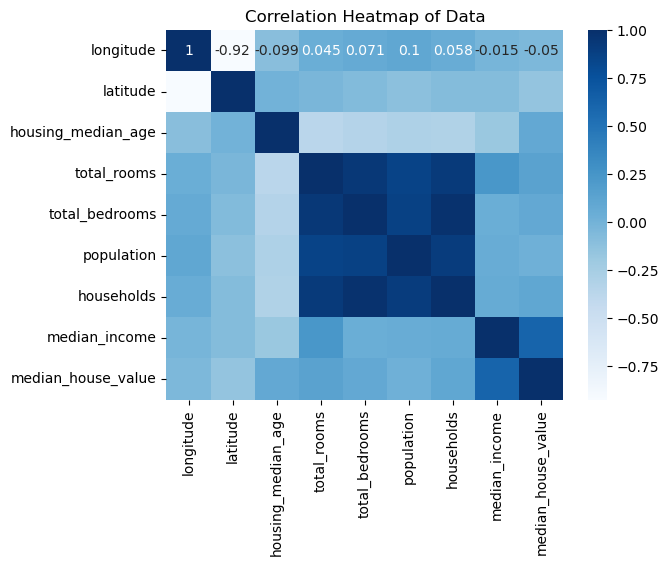

In [20]:
#correlation heatmap
sns.heatmap(df2.drop(['ocean_proximity'], axis = 1).corr(), annot = True, cmap = 'Blues')
plt.title('Correlation Heatmap of Data')


In [21]:
df2 = df2.drop(columns = ['total_bedrooms'])

Encoding Categorical Variables

In [22]:
df2 = pd.get_dummies(df2, columns = ['ocean_proximity'])
df2.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,False,True,False


In [23]:
df3 = df2.drop(['ocean_proximity_ISLAND'] , axis = 1)

Model training and testing

In [24]:
features = df3.drop(columns = ['median_house_value'])
target = df3['median_house_value']

In [25]:
#Splitting test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 69)

In [26]:
print("Length of Train", len(X_train))
print("Length of Test", len(X_test))

Length of Train 15220
Length of Test 3806


In [27]:
#adding a column of ones
X_train_sm = sm.add_constant(X_train)
y_train = y_train.astype(float) #converting to standard datatype
X_train_sm = X_train_sm.astype(float)
#training model
model = sm.OLS(y_train, X_train_sm).fit()

#checking summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2011.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:02:49   Log-Likelihood:            -1.8872e+05
No. Observations:               15220   AIC:                         3.775e+05
Df Residuals:                   15208   BIC:                         3.776e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [29]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)
y_pred

1030      83625.737054
5529     308819.606058
17299    168023.299257
14286    235918.145759
2418     136434.212415
             ...      
1695     269347.790764
4729     242075.322061
49       165454.014016
17898    227193.255709
19529    290631.327244
Length: 3806, dtype: object

linearity

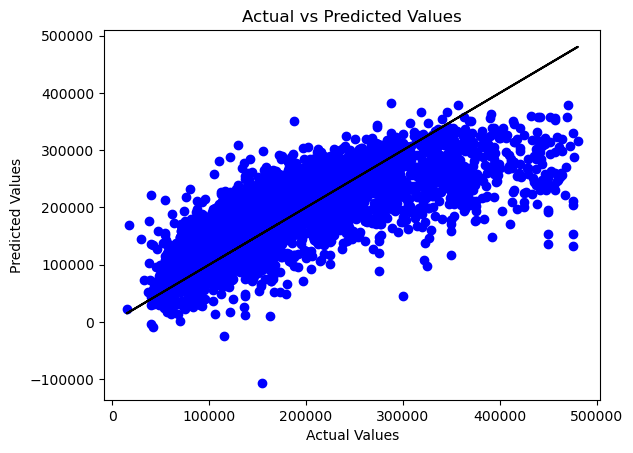

In [30]:
plt.scatter(y_test, y_pred, color = 'blue') #plotting the points
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(y_test, y_test, 'black') #viewing the regression line
plt.show()

normality

In [31]:
mean_residuals = np.mean(model.resid)
np.round(mean_residuals,2)

0.0

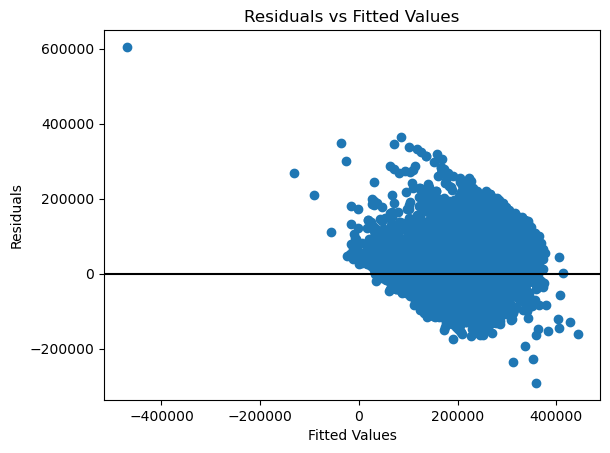

In [32]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y = 0, color = 'black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

exogeneity

In [33]:
for column in X_train.columns:
   correlation = np.corrcoef(X_train[column], model.resid)[0,1]
   print(f"Correlation between {column} and residuals: {np.round(correlation,2)}")

Correlation between longitude and residuals: 0.0
Correlation between latitude and residuals: -0.0
Correlation between housing_median_age and residuals: 0.0
Correlation between total_rooms and residuals: -0.0
Correlation between population and residuals: -0.0
Correlation between households and residuals: -0.0
Correlation between median_income and residuals: -0.0
Correlation between ocean_proximity_<1H OCEAN and residuals: 0.0
Correlation between ocean_proximity_INLAND and residuals: -0.0
Correlation between ocean_proximity_NEAR BAY and residuals: 0.0
Correlation between ocean_proximity_NEAR OCEAN and residuals: -0.0


homoscedasticity

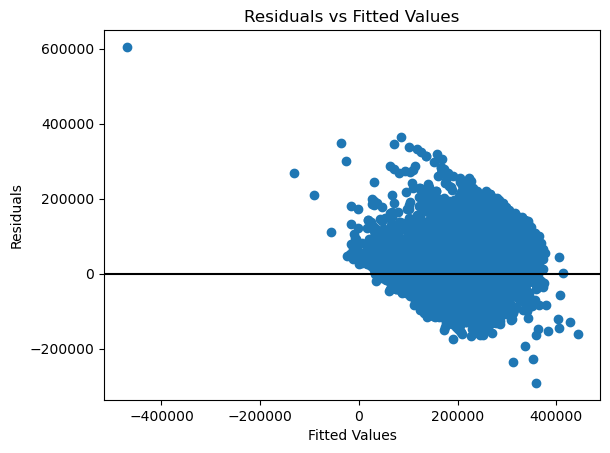

In [34]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y = 0, color = 'black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
#initializing the standardscaler
scaler = StandardScaler()
#fitting and transforming the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #doing the same to the test dataset
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.362349,1.070580,-0.675846,0.372690,0.058199,0.201002,0.646559,-0.868368,-0.720390,2.914566,-0.374266
1,0.163743,0.054575,-1.635090,-0.457648,-0.186050,-0.447877,-0.985214,-0.868368,1.388137,-0.343104,-0.374266
2,0.807096,-0.877922,0.363335,0.161215,0.684411,0.559184,-0.223531,1.151586,-0.720390,-0.343104,-0.374266
3,0.378194,-0.673793,-0.995594,-0.524478,-0.678879,-0.761935,1.916525,1.151586,-0.720390,-0.343104,-0.374266
4,-0.245210,0.490669,-0.356098,-0.297897,0.098907,-0.333675,-1.232893,-0.868368,1.388137,-0.343104,-0.374266
...,...,...,...,...,...,...,...,...,...,...,...
15215,0.627555,-0.738743,1.402517,1.403061,5.195222,4.940419,-1.237201,1.151586,-0.720390,-0.343104,-0.374266
15216,-0.953396,1.399970,-0.755783,-0.762502,-0.840845,-0.855374,1.016913,-0.868368,1.388137,-0.343104,-0.374266
15217,-1.447132,0.949959,1.482454,-0.496556,-0.296915,-0.572462,0.299724,-0.868368,-0.720390,-0.343104,2.671898
15218,0.916815,-0.947512,-0.755783,1.448835,0.230559,1.875112,-0.573616,1.151586,-0.720390,-0.343104,-0.374266


In [36]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
#finding mse, rmse and r square as well as adjusted r squared values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

Mean Squared Error: 3645482593.377297
Root Mean Squared Error: 60377.831969832245
R-squared: 0.5841866759218282
Adjusted R-squared: 0.5829811022357818
